<a href="https://colab.research.google.com/github/chupvl/gcolab/blob/main/2023_02_21_Auto3D_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023-02-21: Testing Auto3D package

## Libs

In [122]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize

import py3Dmol

from ipywidgets import interact, interactive, fixed, Dropdown

import numpy as np
import pandas as pd

In [ ]:
!sudo apt-get install python3-openbabel
# !pip install openbabel will fail with "legacy-install-failure" error
# so, going the other route

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-openbabel is already the newest version (3.0.0+dfsg-3ubuntu3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
# timed-out... weird...
!pip install Auto3D --default-timeout=100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ok, doing with  pip installation via local clone
!git clone https://github.com/isayevlab/Auto3D_pkg.git

fatal: destination path 'Auto3D_pkg' already exists and is not an empty directory.


In [ ]:
!pip install ./Auto3D_pkg/. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./Auto3D_pkg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Auto3D: filename=Auto3D-2.0-py3-none-any.whl size=41890693 sha256=2110df595dc3d12ce6f813d9b3d4a63e0ed4cffce8776c9a0538dc8a3ff08b76
  Stored in directory: /tmp/pip-ephem-wheel-cache-659f9mkz/wheels/ae/d8/3a/77f6c9bd2b0053a41db36326c6d96f9abaafdeaeaf0170363e
Successfully built Auto3D
  Attempting uninstall: Auto3D
    Found existing installation: Auto3D 2.0
    Uninstalling Auto3D-2.0:
      Successfully uninstalled Auto3D-2.0


## Functions

In [ ]:
def std_smiles(smiles):
  '''Compound standardization using rdkit'''
  try:
    s_std = rdMolStandardize.StandardizeSmiles(smiles)
    mol_std = Chem.MolFromSmiles(s_std)
    lfc = rdMolStandardize.LargestFragmentChooser()
    mol_std = lfc.choose(mol_std)
    return Chem.MolToSmiles(mol_std)
  except:
    return None

In [140]:
def mol_clashes(mol, dist_cutoff=1, verbose=False):
    '''for a rdkit molecule return number of clashes with a specified cutoff''' 
    distances = AllChem.Get3DDistanceMatrix(mol)
    nClashes = sum(distances[np.triu_indices(len(distances), k = 1)] < dist_cutoff)
    if verbose:
        if nClashes > 0:
            print(f'Number of clashes between atoms: {nClashes}')
        else:
            print(f'There are no clashes between atoms')
    return nClashes

In [144]:
# from: http://rdkit.blogspot.com/2016/07/using-ipywidgets-and-py3dmol-to-browse.html
def drawit(m, p):
        mb = Chem.MolToMolBlock(m)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

## Tesing Auto3D

In [ ]:
from Auto3D.auto3D import options, main
print(Auto3D.__version__)

2.0


In [ ]:
%%time
smiles_file = './Auto3D_pkg/example/files/smiles.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=False)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: ./Auto3D_pkg/example/files/smiles.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230221-173311-726173
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdkit
INFO:auto3d:enumerate_isomer: Tru

Checking input file...
	There are 4 SMILES in the input file ./Auto3D_pkg/example/files/smiles.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 12 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 4


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 1 minutes
INFO:auto3d:Output path: /content/Auto3D_pkg/example/files/20230221-173311-726173_smiles/smiles_out.sdf


Energy unit: Hartree if implicit.
Program running time: 1 minutes
Output path: /content/Auto3D_pkg/example/files/20230221-173311-726173_smiles/smiles_out.sdf
/content/Auto3D_pkg/example/files/20230221-173311-726173_smiles/smiles_out.sdf
CPU times: user 588 ms, sys: 159 ms, total: 747 ms
Wall time: 1min 23s


In [ ]:
wall_time = 60+18
print(f'Seconds per compound: {wall_time/4}')
# # patience is important parameter according to Zhen (M2D2 talk)

Seconds per compound: 19.5


,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,smi1,-479.9679258021655,0.0028418591246008873,True,0.0,
1,smi2,-232.6690872538066,0.0028577586635947227,True,0.0,
2,smi3,-346.072726740648,0.002863106084987521,True,0.0,
3,smi4,-349.49279516161096,0.002986761275678873,True,0.0,

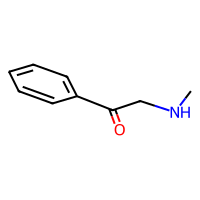
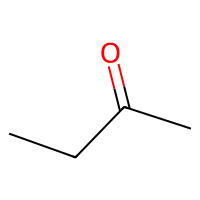
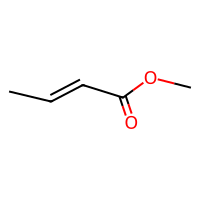
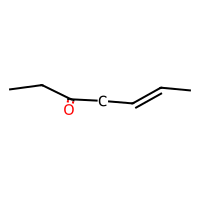

In [ ]:
df = PandasTools.LoadSDF('/content/Auto3D_pkg/example/files/20230221-162650-273806_smiles/smiles_out.sdf')
df

In [ ]:
%%time
smiles_file = './Auto3D_pkg/example/files/smiles.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=False, patience=100)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: ./Auto3D_pkg/example/files/smiles.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230221-173435-033485
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdkit
INFO:auto3d:enumerate_isomer: Tru

Checking input file...
	There are 4 SMILES in the input file ./Auto3D_pkg/example/files/smiles.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 12 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 4


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 0 minutes
INFO:auto3d:Output path: /content/Auto3D_pkg/example/files/20230221-173435-033485_smiles/smiles_out.sdf


Energy unit: Hartree if implicit.
Program running time: 0 minutes
Output path: /content/Auto3D_pkg/example/files/20230221-173435-033485_smiles/smiles_out.sdf
/content/Auto3D_pkg/example/files/20230221-173435-033485_smiles/smiles_out.sdf
CPU times: user 390 ms, sys: 104 ms, total: 495 ms
Wall time: 44.7 s


In [ ]:
wall_time = 45
print(f'Seconds per compound: {wall_time/4}')
# # patience is important parameter according to Zhen (M2D2 talk)

Seconds per compound: 11.25


,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,smi1,-479.9679258021655,0.0028418591246008873,True,0.0,
1,smi2,-232.6690872538066,0.0028577586635947227,True,0.0,
2,smi3,-346.072726740648,0.002863106084987521,True,0.0,
3,smi4,-349.49031244344724,0.0029981571715325117,True,0.0,

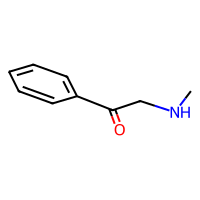
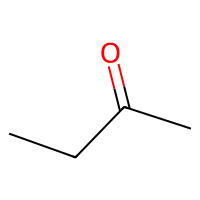
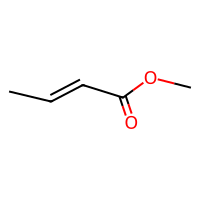
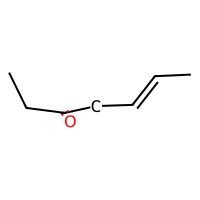

In [ ]:
df = PandasTools.LoadSDF('/content/Auto3D_pkg/example/files/20230221-173435-033485_smiles/smiles_out.sdf')
df

## Testing Auto3D: drug-like compounds

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_drugs = pd.read_csv('/content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221.csv')
df_drugs_test = df_drugs.sample(10)
df_drugs_test['canonical_smiles_std'] = [ std_smiles(s) for s in df_drugs_test['canonical_smiles'].values ]

,molecule_chembl_id,canonical_smiles,mw,natoms
0,CHEMBL6731,CC(N)Cc1ccc2c(c1)OCO2,165.992903,13
1,CHEMBL7075,CC1(C)CC(C)(C)c2cc(N/C(S)=N/c3ccc([N+](=O)[O-]...,377.943193,27
2,CHEMBL269277,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,407.984744,33
3,CHEMBL7983,CCCOC(=O)c1cc(O)c(O)c(O)c1,199.974573,15
4,CHEMBL8809,CCN1CCC[C@H]1CNC(=O)c1c(O)c(Cl)cc(Cl)c1OC,325.928597,22


In [ ]:
df_drugs_test[['canonical_smiles_std', 'molecule_chembl_id']].to_csv('/content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi', header=False, sep=' ', index=False)

In [120]:
%%time
smiles_file = '/content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi'
if __name__ == "__main__":
    path = smiles_file
    args = options(path, k=1, use_gpu=False, patience=100)   #specify the parameters for Auto3D 
    out = main(args)            #main acceps the parameters and run Auto3D
    print(out)

INFO:auto3d:
             _              _             _____   ____  
            / \     _   _  | |_    ___   |___ /  |  _ \ 
           / _ \   | | | | | __|  / _ \    |_ \  | | | |
          / ___ \  | |_| | | |_  | (_) |  ___) | | |_| |
         /_/   \_\  \__,_|  \__|  \___/  |____/  |____/  2.0
                // Automatic generation of the low-energy 3D structures                                      
        
INFO:auto3d:================================================================================
INFO:auto3d:                               INPUT PARAMETERS
INFO:auto3d:================================================================================
INFO:auto3d:path: /content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi
INFO:auto3d:k: 1
INFO:auto3d:window: False
INFO:auto3d:verbose: False
INFO:auto3d:job_name: 20230221-190203-651031
INFO:auto3d:enumerate_tautomer: False
INFO:auto3d:tauto_engine: rdkit
INFO:auto3d:pKaNorm: True
INFO:auto3d:isomer_engine: rdki

Checking input file...
	There are 10 SMILES in the input file /content/gdrive/MyDrive/gcollab/data/chembl_drugs_lite_20230221_test.smi. 
	All SMILES and IDs are valid.
Suggestions for choosing isomer_engine and optimizing_engine: 
	Isomer engine options: RDKit and Omega.
	Optimizing engine options: ANI2x, ANI2xt and AIMNET.
The available memory is 12 GB.
The task will be divided into 1 jobs.
Job1, number of inputs: 10


INFO:auto3d:Energy unit: Hartree if implicit.
INFO:auto3d:Program running time: 1 hours and 15 minutes
INFO:auto3d:Output path: /content/gdrive/MyDrive/gcollab/data/20230221-190203-651031_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf


Energy unit: Hartree if implicit.
Program running time: 1 hours and 15 minutes
Output path: /content/gdrive/MyDrive/gcollab/data/20230221-190203-651031_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf
/content/gdrive/MyDrive/gcollab/data/20230221-190203-651031_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf
CPU times: user 22.5 s, sys: 2.88 s, total: 25.4 s
Wall time: 1h 15min 4s


In [162]:
wall_time = (60 + 15)*60
print(f'Seconds per compound: {wall_time/10} ')
# patience is important parameter according to Zhen (M2D2 talk)
# 450 is an overkill

Seconds per compound: 450.0 


In [126]:
df_drugs_test_3D = PandasTools.LoadSDF('/content/gdrive/MyDrive/gcollab/data/20230221-190203-651031_chembl_drugs_lite_20230221_test/chembl_drugs_lite_20230221_test_out.sdf')

In [141]:
for m in df_drugs_test_3D['ROMol'].values:
  n = mol_clashes(m)
  if n > 0:
    print('Molecule has clashes')

In [157]:
options = [(name, value) for name, value in zip(df_drugs_test_3D['ID'], df_drugs_test_3D['ROMol'].values)]
dropdown = Dropdown(options=options)
interact(drawit, m=dropdown, p=fixed(p));
# apologies, I removed common names for those compounds...
# also, take into account that those conformations are for the gas phase
# PS: all looks good to me

interactive(children=(Dropdown(description='m', options=(('CHEMBL1537', <rdkit.Chem.rdchem.Mol object at 0x7f5…

## Additional comments

Isomer engine options: RDKit and Omega. --- If it's OpenEye Omega - license?